In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"D:\mainflow\USvideos.csv")

In [3]:
print(data.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [5]:
# Drop rows with missing values in 'description' column
data = data.dropna(subset=['description'])

In [6]:
# Confirm missing values are handled
print("Missing values after dropping rows:\n", data.isnull().sum())

Missing values after dropping rows:
 video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [7]:
# Convert date columns to datetime
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'])

In [8]:
# Display data types
print("Data types:\n", data.dtypes)

Data types:
 video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object


In [9]:
# Separate columns by data type
num_cols = data.select_dtypes(include=['int64']).columns
obj_cols = data.select_dtypes(include=['object']).columns
dt_cols = data.select_dtypes(include=['datetime64']).columns
bool_cols = data.select_dtypes(include=['bool']).columns

In [10]:
# Display basic statistics of numeric columns
print("Descriptive statistics:\n", data[num_cols].describe())

# Display data info
print("Data info:\n", data.info())

Descriptive statistics:
         category_id         views         likes      dislikes  comment_count
count  40379.000000  4.037900e+04  4.037900e+04  4.037900e+04   4.037900e+04
mean      19.944253  2.370839e+06  7.461677e+04  3.508122e+03   8.287396e+03
std        7.594850  7.428515e+06  2.296172e+05  2.317486e+04   3.431605e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.470760e+05  5.621500e+03  2.050000e+02   6.230000e+02
50%       24.000000  6.895970e+05  1.837100e+04  6.370000e+02   1.874000e+03
75%       25.000000  1.834912e+06  5.567200e+04  1.948000e+03   5.787000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.643059e+06   1.228655e+06
<class 'pandas.core.frame.DataFrame'>
Index: 40379 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40379 non-null  obj

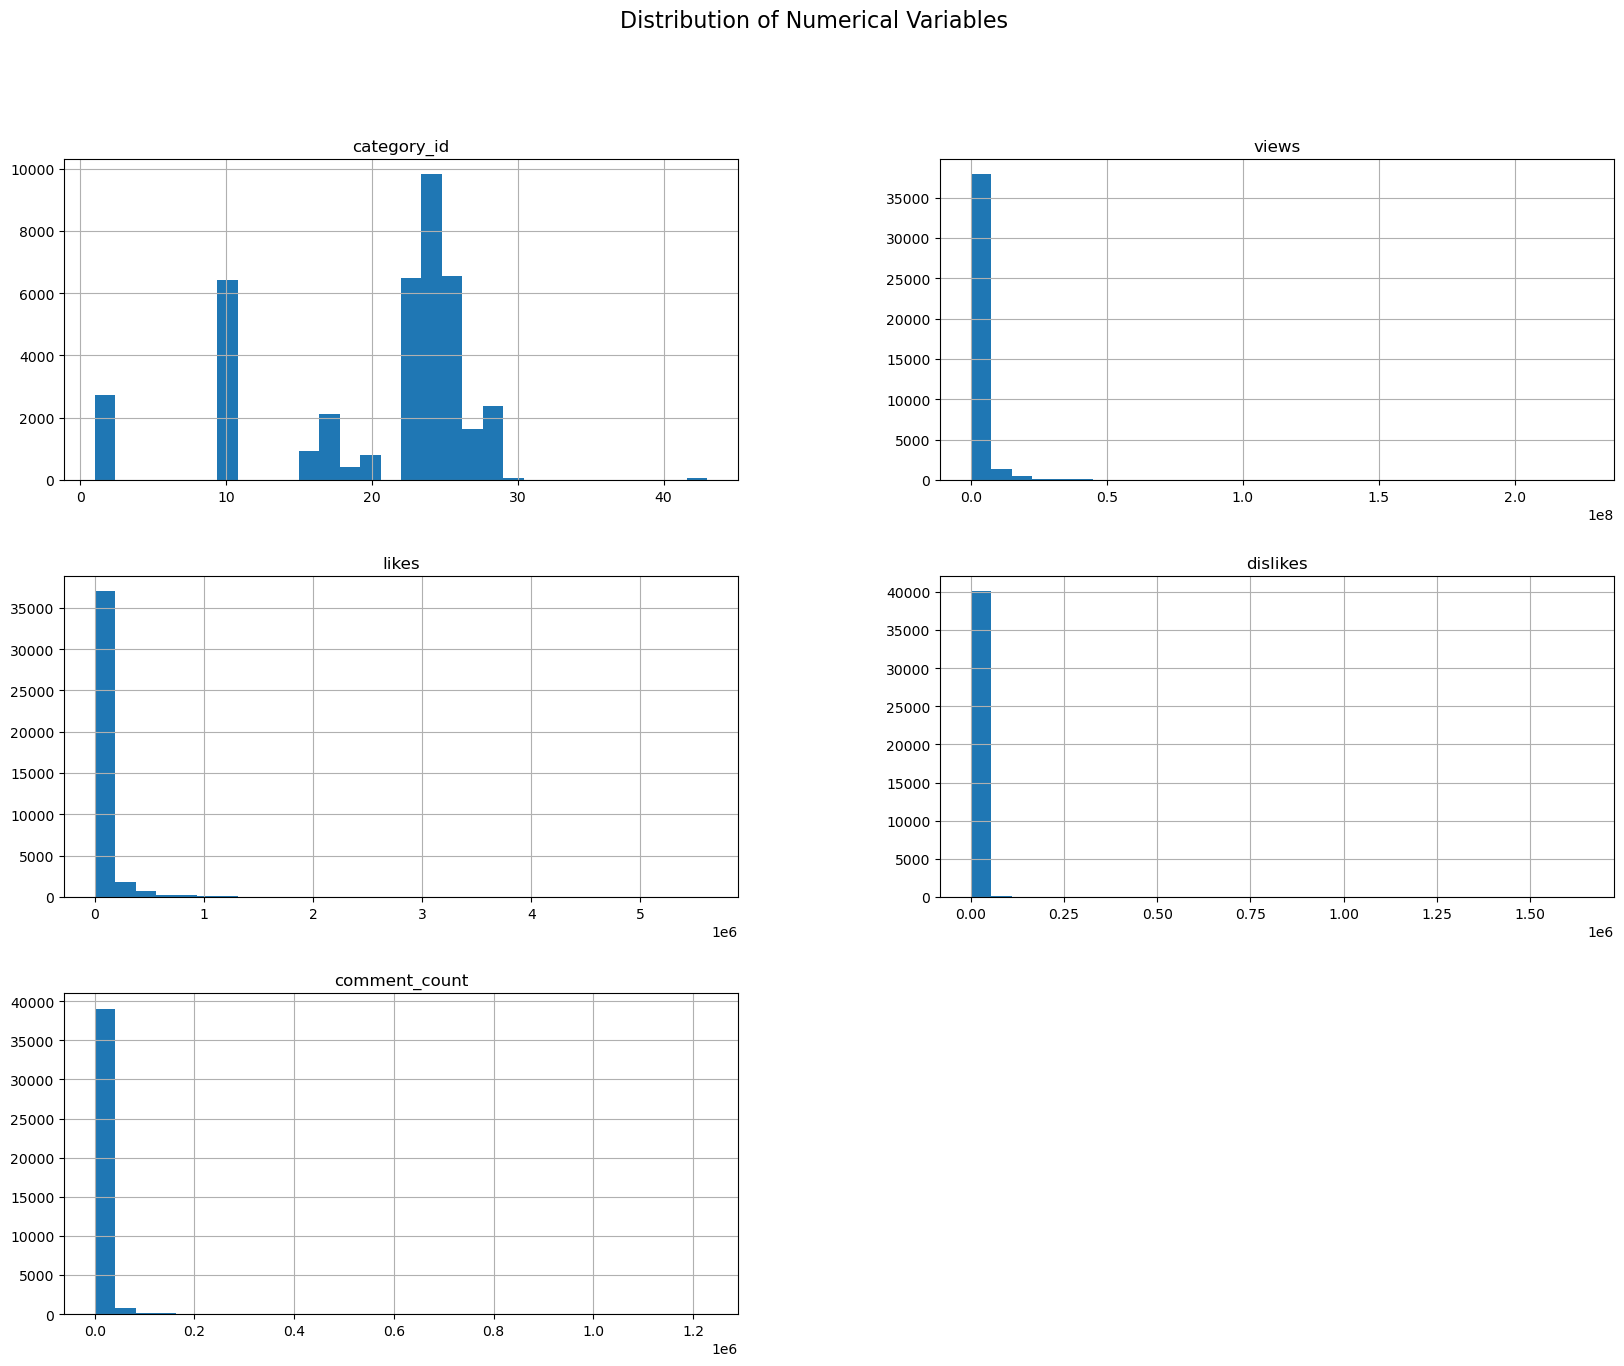

In [11]:
# Plot histograms for numeric variables
data[num_cols].hist(figsize=(20, 15), bins=30)
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

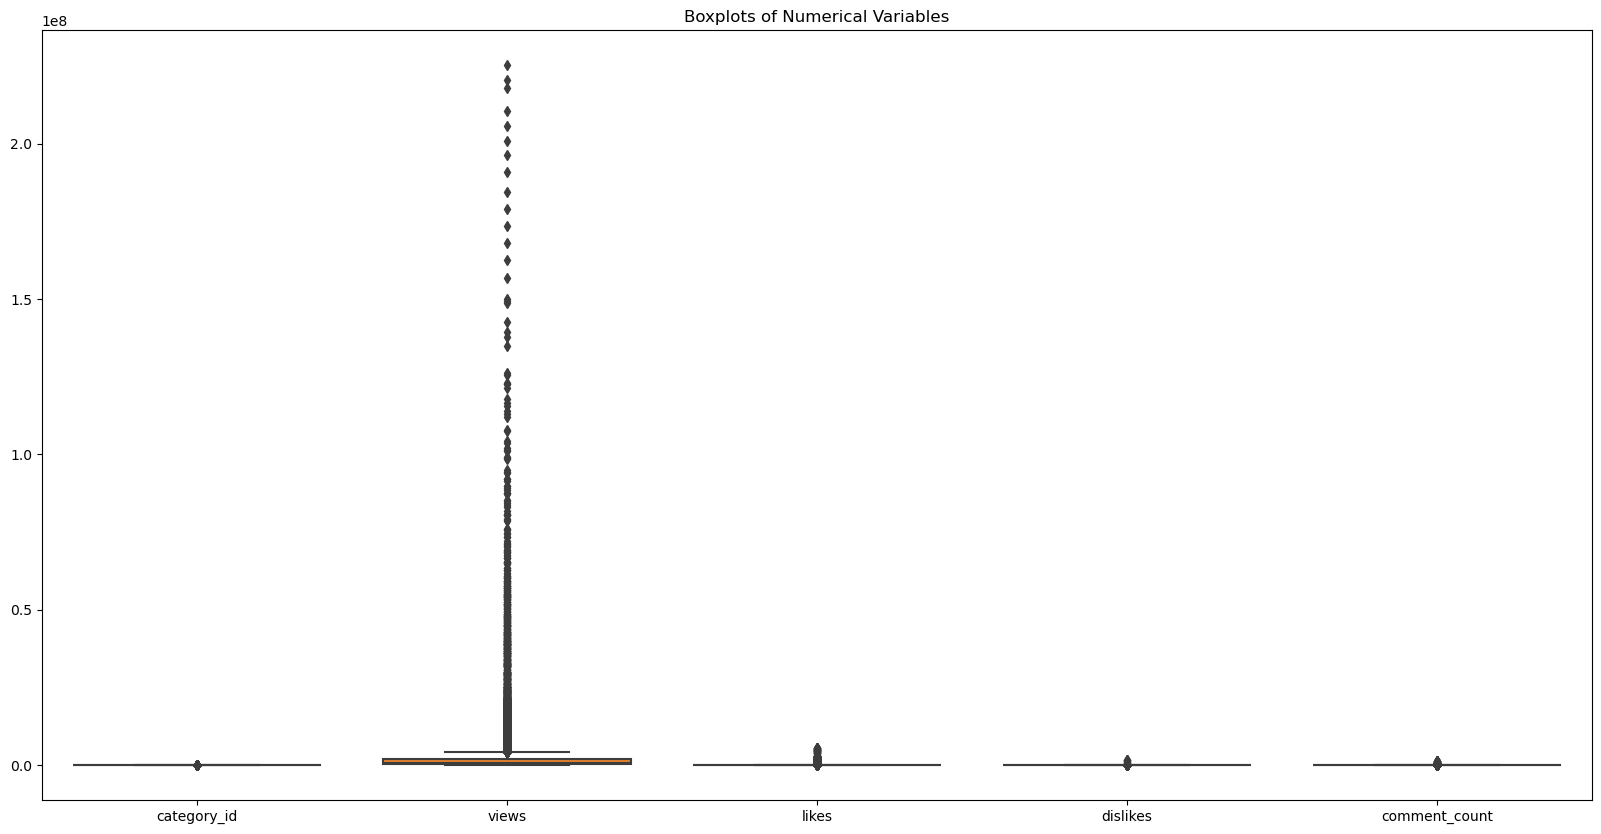

In [12]:
# Plot boxplots for numeric variables to identify outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[num_cols])
plt.title('Boxplots of Numerical Variables')
plt.show()

C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhupesh Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

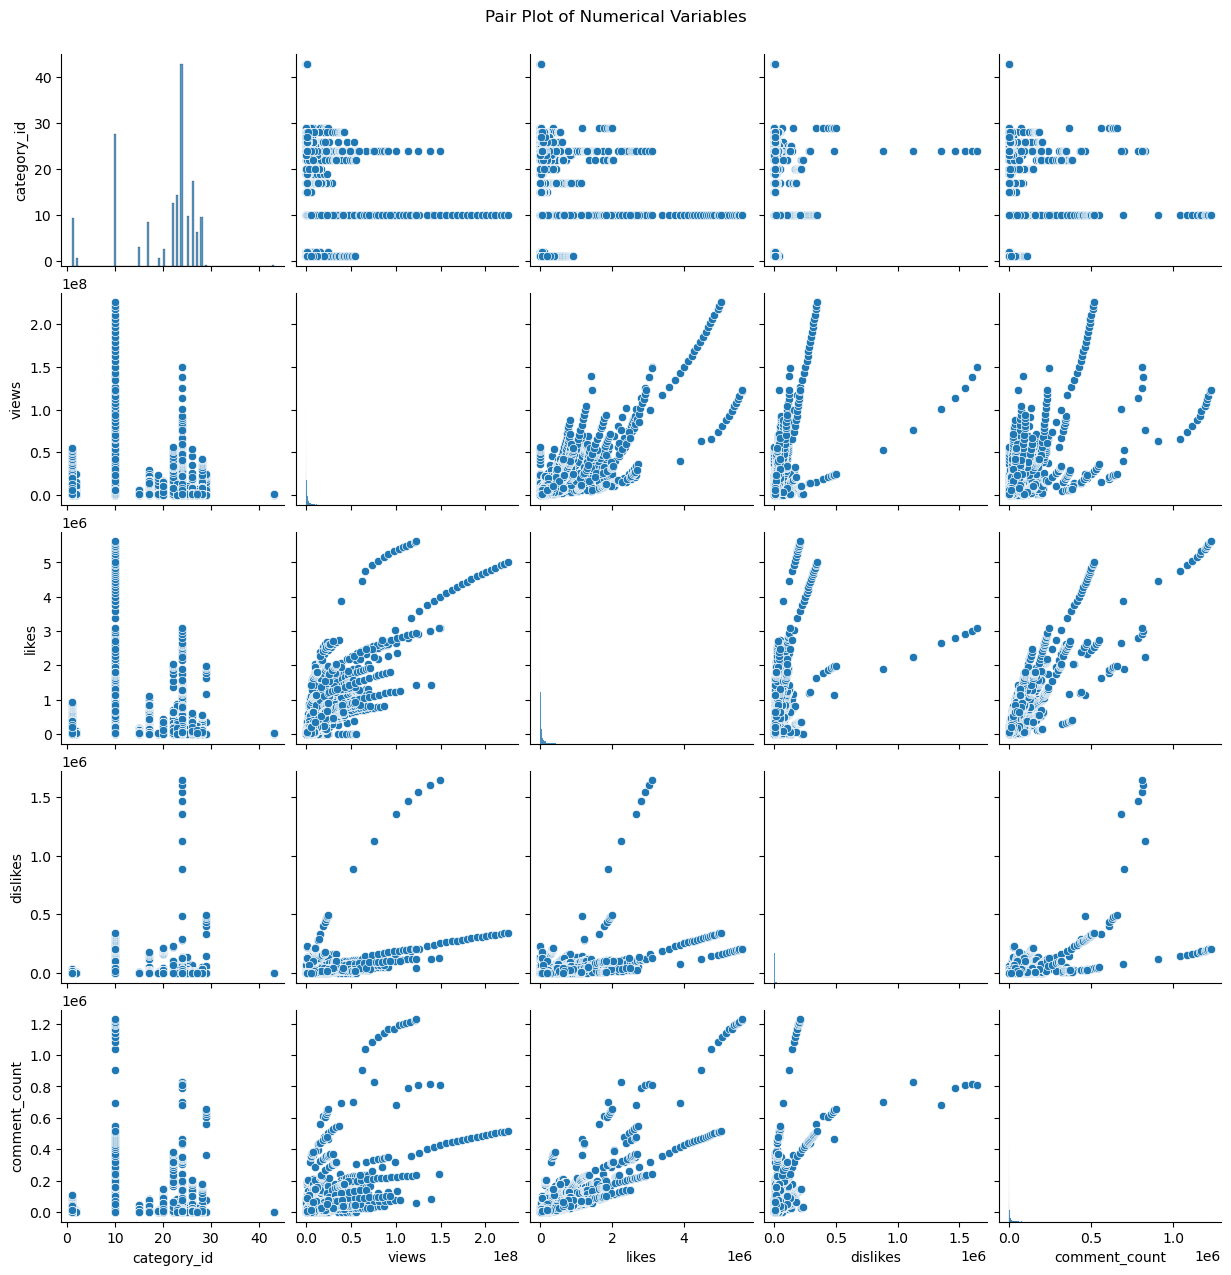

In [13]:
# Scatter plot matrix (pair plot) for numeric variables
sns.pairplot(data[num_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

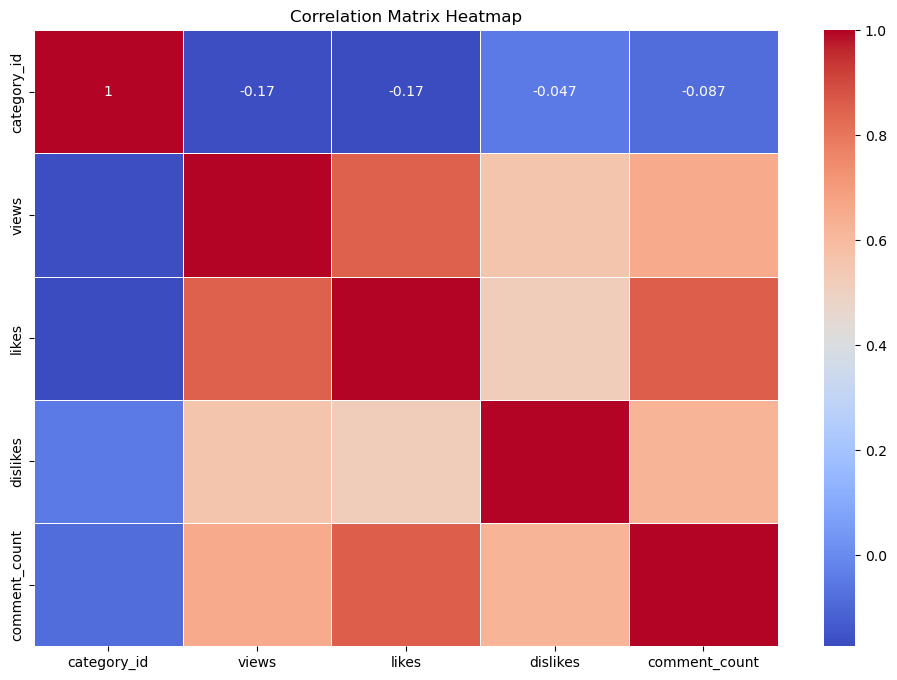

In [14]:
# Plot correlation heatmap for numeric variables
corr_matrix = data[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Plot count plots for categorical variables
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.countplot(y='comments_disabled', data=data)
plt.title('Count of Comments Disabled')

plt.subplot(3, 1, 2)
sns.countplot(y='ratings_disabled', data=data)
plt.title('Count of Ratings Disabled')

plt.subplot(3, 1, 3)
sns.countplot(y='video_error_or_removed', data=data)
plt.title('Count of Video Error or Removed')

plt.tight_layout()
plt.show()

In [ ]:
# Extract date and time from 'publish_time'
data['publish_date'] = data['publish_time'].dt.date
data['publish_time_only'] = data['publish_time'].dt.time

In [ ]:
# Plot the distribution of publish dates
plt.figure(figsize=(20, 10))
data['publish_date'] = pd.to_datetime(data['publish_date'])
data['publish_date'].value_counts().sort_index().plot()
plt.title('Distribution of Publish Dates')
plt.xlabel('Publish Date')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Remove outliers using the Interquartile Range (IQR) method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Display cleaned data
print(data_cleaned)